# 1. Boston 주택 가격 예측 모델
---

- CRIM:	자치시별 1인당 범죄율
- ZN:	25,000 평방피트를 초과하는 거주지역의 비율
- INDUS:	비소매상업지역이 점유하고 있는 토지의 비율
- CHAS:	찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX:	10ppm 당 농축 일산화질소
- RM:	주택 1 가구당 평균 방의 개수
- AGE:	1940년 이전에 건축된 소유주택의 비율
- DIS:	5개의 보스턴 직업센터까지의 접근성 지수
- RAD:	방사형 도로까지의 접근성 지수
- TAX:	10,000 달러당 재산세율
- PTRATIO:	자치시(town)별 학생/교사 비율
- B: $1000(Bk−0.63)^2$, 여기서 $Bk$는 자치시별 흑인의 비율을 말함
- LSTAT	모집단의 하위계층의 비율(%)
- MEDV	본인 소유의 주택가격(중앙값)(단위: $1,000)


## 데이터 로드 및 전처리
---

In [1]:
# 모듈 임포트

from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드 및 확인

# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print("train data 개수:", len(train_data))
print("test data 개수", len(test_data))

65536/57026 [==================================] - 0s 0us/step
train data 개수: 404
test data 개수 102


### 문제 1-1. 데이터셋의 전처리를 위해 표준화 작업을 수행합니다. 

In [3]:
# 데이터 전처리

# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
import numpy as np
mean = np.mean(train_data, axis=0)
train_data-= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = np.std(train_data, axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

## 모델 구성 및 컴파일
---

### 문제 1-2. 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

from keras import models, layers

# 모델 구성
model = models.Sequential()
model.add(layers.Dense(256, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))

# 모델 컴파일
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## 모델 학습
---

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.

# 검증 데이터 분할
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {train_data.shape} 레이블: {train_labels.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")

전체 학습 데이터: (404, 13) 레이블: (404,)
학습 데이터: (282, 13) 레이블: (282,)
검증 데이터: (122, 13) 레이블: (122,)


In [6]:
# 모델 학습

history = model.fit(x_train, y_train,
                    epochs=300,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/300
1/1 [==============================] - 13s 13s/step - loss: 561.9020 - mae: 21.8605 - val_loss: 553.1756 - val_mae: 21.7054
Epoch 2/300
1/1 [==============================] - 0s 22ms/step - loss: 511.7598 - mae: 20.7048 - val_loss: 508.7818 - val_mae: 20.7132
Epoch 3/300
1/1 [==============================] - 0s 22ms/step - loss: 471.2975 - mae: 19.7376 - val_loss: 465.0432 - val_mae: 19.6938
Epoch 4/300
1/1 [==============================] - 0s 24ms/step - loss: 432.1905 - mae: 18.7719 - val_loss: 422.1195 - val_mae: 18.6522
Epoch 5/300
1/1 [==============================] - 0s 22ms/step - loss: 392.8469 - mae: 17.7659 - val_loss: 380.2831 - val_mae: 17.6012
Epoch 6/300
1/1 [==============================] - 0s 21ms/step - loss: 355.9285 - mae: 16.7786 - val_loss: 339.9837 - val_mae: 16.5277
Epoch 7/300
1/1 [==============================] - 0s 21ms/step - loss: 316.8877 - mae: 15.7460 - val_loss: 301.6005 - val_mae: 15.4344
Epoch 8/300
1/1 [==============================]

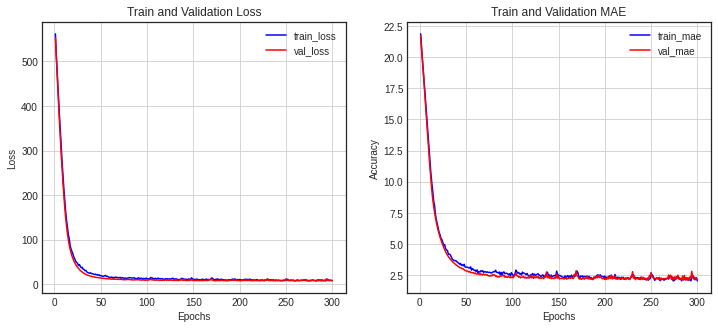

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측
---

In [8]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 20.6061 - mae: 2.8216


[20.60614776611328, 2.821554660797119]

# 2. Reuters 딥러닝 모델
---

## 데이터 로드 및 전처리
---

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [10]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

# 데이터셋 로드
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리
from sklearn.model_selection import train_test_split

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                                                  test_size=0.25,
                                                  random_state=123)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2121728/2110848 [==============================] - 0s 0us/step
6736
2246
2246
46


In [11]:
# 전처리
word_index = reuters.get_word_index()
index_word = dict([(value, key) for (key, value) in word_index.items()])

# train_data[0]의 각 인덱스에 매핑되는 단어들로 연결하여 하나의 리뷰를 만들어 줍니다.

news = ' '.join([str(i) for i in train_data[0]])
news

# 단어 인덱스에서 0은 패딩을 의미하는 토큰인 pad, 1은 문장의 시작을 의미하는 토큰인 sos, 2는 OOV(Out Of Vocabulary)를 의미하는 토큰인 unk으로 지정되어 있다.
# 그러므로 i-3으로 인덱스를 맞춰주고, 해당 토큰들은 ?로 대체합니다.

news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
news

565248/550378 [==============================] - 0s 0us/step


"? australian beef output is forecast to decline to 1 34 mln tonnes ? weight in 1987 and 1 36 mln in 1988 from 1 44 mln in 1986 the australian meat and live stock corp amlc said exports of beef ? are also predicted to decline to 480 000 tonnes shipped weight in 1987 from 515 000 in 1986 and then rally to 490 000 in 1988 the amlc said in a summary of its bi annual meat and livestock forecasts it sees cattle numbers remaining at around the 1986 level of 23 2 mln ? in both years because herd ? is expected to be slower than previously forecast beef producers are becoming more confident that higher returns in the market both domestically and overseas will continue the amlc said the slow herd build up and the forecast lower production is expected to bring about a slight drop in both export and domestic consumption this year it said the forecast does not assume a turnaround in production levels until late next year it said the outlook for beef exports as a proportion of output remains much th

In [12]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])

[0. 1. 1. ... 0. 0. 0.]
23 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 모델 구성 및 컴파일
---

In [13]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers, initializers

initializer = initializers.HeNormal()

model = models.Sequential()
model.add(layers.Dense(512, 
                       input_shape=(10000, ), 
                       name='input',
                       kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256,
                       name='hidden1',
                       kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
# model.add(layers.Dense(256, 
#                        name='hidden2',
#                        kernel_initializer=initializer))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('sigmoid')) 
# model.add(layers.Dropout(0.4))
# # model.add(layers.Dense(64,
# #                        name='hidden3',
# #                        kernel_initializer=initializer))
# # model.add(layers.BatchNormalization())
# # model.add(layers.Activation('relu')) 
# # model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 512)               5120512   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)              

## 모델 학습
---

In [15]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('best_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=100, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, 
                    epochs=1000,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/1000
53/53 [==============================] - 2s 15ms/step - loss: 2.9519 - accuracy: 0.3587 - val_loss: 3.3075 - val_accuracy: 0.5191
Epoch 2/1000
53/53 [==============================] - 0s 7ms/step - loss: 2.0074 - accuracy: 0.5377 - val_loss: 2.9064 - val_accuracy: 0.5570
Epoch 3/1000
53/53 [==============================] - 0s 7ms/step - loss: 1.7392 - accuracy: 0.5934 - val_loss: 2.5805 - val_accuracy: 0.6060
Epoch 4/1000
53/53 [==============================] - 0s 7ms/step - loss: 1.5743 - accuracy: 0.6321 - val_loss: 2.2913 - val_accuracy: 0.6447
Epoch 5/1000
53/53 [==============================] - 0s 7ms/step - loss: 1.4645 - accuracy: 0.6588 - val_loss: 1.9957 - val_accuracy: 0.6745
Epoch 6/1000
53/53 [==============================] - 0s 7ms/step - loss: 1.3726 - accuracy: 0.6722 - val_loss: 1.7487 - val_accuracy: 0.6941
Epoch 7/1000
53/53 [==============================] - 0s 7ms/step - loss: 1.3107 - accuracy: 0.6857 - val_loss: 1.5499 - val_accuracy: 0.7115
Epoch

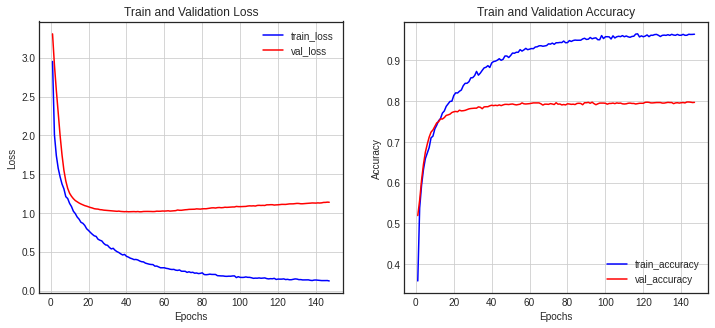

In [16]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측
---

In [17]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 0.9979 - accuracy: 0.7850


[0.9978505373001099, 0.7849510312080383]

# 3. CIFAR10 딥러닝 모델
---

## 데이터 로드 및 전처리
---

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [20]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.

# 데이터 로드
(x_train_full,y_train_full),(x_test,y_test) = cifar10.load_data()

# 검증 데이터 분할
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170508288/170498071 [==============================] - 4s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [21]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

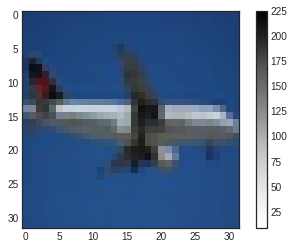

In [22]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [23]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [24]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 3072(=32 * 32 * 3)로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [25]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [26]:
from tensorflow.keras.utils import to_categorical

# 레이블을 원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

## 모델 구성 및 컴파일
---

In [96]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers, initializers, utils

initializer = initializers.HeNormal()

model = models.Sequential()
model.add(layers.Dense(1024, 
                       input_shape=(x_train.shape[1], ), 
                       name='input',
                       kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,
                       name='hidden1',
                       kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, 
                       name='hidden2',
                       kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, 
                       name='hidden3',
                       kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
# model.add(layers.Dense(128, 
#                        name='hidden4',
#                        kernel_initializer=initializer))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu')) 
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(128, 
#                        name='hidden5',
#                        kernel_initializer=initializer))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu')) 
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(64, 
#                        name='hidden6',
#                        kernel_initializer=initializer))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu')) 
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(32, 
#                        name='hidden7',
#                        kernel_initializer=initializer))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu')) 
# model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax', name='output'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 1024)              3146752   
_________________________________________________________________
batch_normalization_54 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_54 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 1024)              0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_55 (Batc (None, 512)               2048      
_________________________________________________________________
activation_55 (Activation)   (None, 512)             

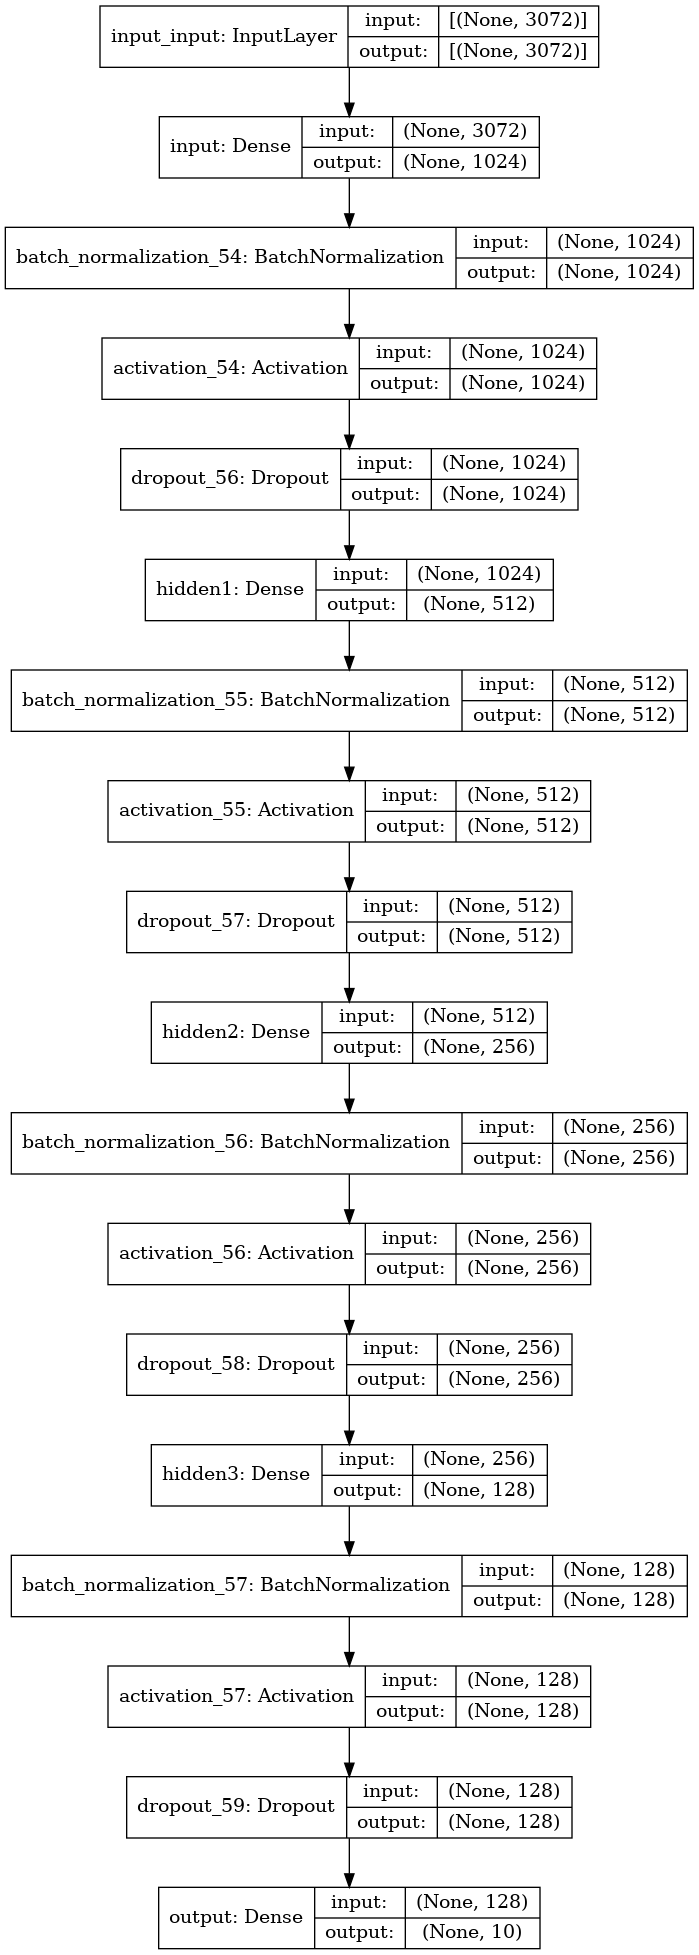

In [98]:
utils.plot_model(model, show_shapes=True)

In [99]:
check_point_cb = callbacks.ModelCheckpoint('cifar10.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, 
                    epochs=3000,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/3000
313/313 [==============================] - 4s 8ms/step - loss: 2.6889 - accuracy: 0.1281 - val_loss: 2.1080 - val_accuracy: 0.2289
Epoch 2/3000
313/313 [==============================] - 2s 7ms/step - loss: 2.3723 - accuracy: 0.1734 - val_loss: 1.9929 - val_accuracy: 0.2869
Epoch 3/3000
313/313 [==============================] - 2s 6ms/step - loss: 2.2171 - accuracy: 0.2035 - val_loss: 1.9284 - val_accuracy: 0.3101
Epoch 4/3000
313/313 [==============================] - 2s 6ms/step - loss: 2.1173 - accuracy: 0.2293 - val_loss: 1.9059 - val_accuracy: 0.3110
Epoch 5/3000
313/313 [==============================] - 2s 7ms/step - loss: 2.0510 - accuracy: 0.2453 - val_loss: 1.8696 - val_accuracy: 0.3233
Epoch 6/3000
313/313 [==============================] - 2s 6ms/step - loss: 1.9984 - accuracy: 0.2630 - val_loss: 1.8382 - val_accuracy: 0.3340
Epoch 7/3000
313/313 [==============================] - 2s 6ms/step - loss: 1.9693 - accuracy: 0.2763 - val_loss: 1.8388 - val_accuracy:

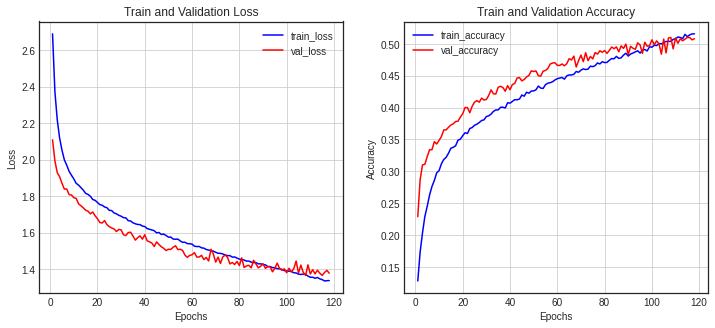

In [100]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [101]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3484 - accuracy: 0.5160


[1.348374366760254, 0.515999972820282]